<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/ANN/ANN_Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Test whether the GPU is working or not

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [6]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [11]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform', activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# binary_crossentropy : output binary format


# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100) # batch size: specific use computational power use
# one epoch = one forward pass and one backward pass of all the training examples
#batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.





Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.7611 - accuracy: 0.5647 - val_loss: 0.5554 - val_accuracy: 0.7531
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5298 - accuracy: 0.7775 - val_loss: 0.5121 - val_accuracy: 0.7944
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4984 - accuracy: 0.7979 - val_loss: 0.4982 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4858 - accuracy: 0.8001 - val_loss: 0.4889 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4930 - accuracy: 0.7817 - val_loss: 0.4808 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4697 - accuracy: 0.7981 - val_loss: 0.4738 - val_accuracy: 0.7963
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4632 - accuracy: 0.7978 - val_loss: 0.4673 - val_accuracy: 0.7978

In [16]:
classifier.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 6)                 72        
_________________________________________________________________
dense_191 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


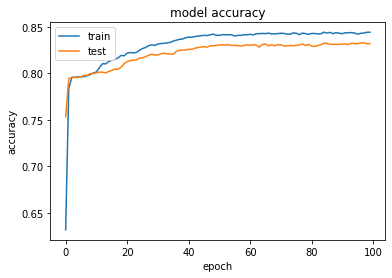

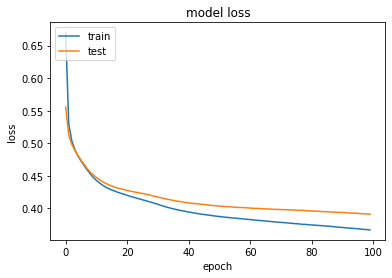

In [17]:

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[1557   38]
 [ 256  149]]
0.853


In [20]:
# Create deep neural nets usung Dropout
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer= 'he_uniform', activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dropout(0.4))
# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dropout(0.2))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# binary_crossentropy : output binary format


# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 1.0251 - accuracy: 0.3949 - val_loss: 0.5410 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5958 - accuracy: 0.7526 - val_loss: 0.5093 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5432 - accuracy: 0.7824 - val_loss: 0.4946 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5290 - accuracy: 0.7907 - val_loss: 0.4853 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4959 - accuracy: 0.7962 - val_loss: 0.4778 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4994 - accuracy: 0.7957 - val_loss: 0.4713 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4883 - accuracy: 0.7972 - val_loss: 0.4659 - val_accuracy: 0.7955

In [23]:
classifier.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 10)                120       
_________________________________________________________________
dropout_123 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_194 (Dense)            (None, 20)                220       
_________________________________________________________________
dropout_124 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_195 (Dense)            (None, 15)                315       
_________________________________________________________________
dropout_125 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_196 (Dense)            (None, 1)               

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


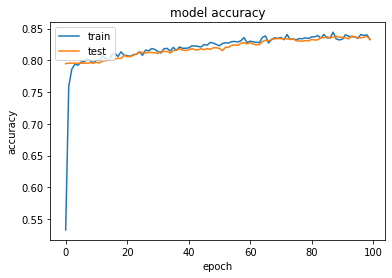

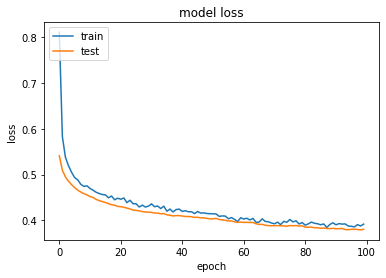

In [21]:
# Model History Graph after adding Dropout and third layer add

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[1581   14]
 [ 298  107]]
0.844


In [4]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [5]:

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, y_train)

print([grid_result.best_score_,grid_result.best_params_])

[0.8553750038146972, {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}]


In [24]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 45, kernel_initializer= 'he_uniform', activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 30, kernel_initializer = 'he_uniform', activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# binary_crossentropy : output binary format


# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 128, epochs = 30)

Epoch 1/30
42/42 [==============================] - 1s 9ms/step - loss: 0.5042 - accuracy: 0.8004 - val_loss: 0.4864 - val_accuracy: 0.7978
Epoch 2/30
42/42 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7982 - val_loss: 0.4699 - val_accuracy: 0.7967
Epoch 3/30
42/42 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.7898 - val_loss: 0.4603 - val_accuracy: 0.7967
Epoch 4/30
42/42 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7941 - val_loss: 0.4532 - val_accuracy: 0.7986
Epoch 5/30
42/42 [==============================] - 0s 4ms/step - loss: 0.4390 - accuracy: 0.7995 - val_loss: 0.4483 - val_accuracy: 0.8012
Epoch 6/30
42/42 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8121 - val_loss: 0.4448 - val_accuracy: 0.8016
Epoch 7/30
42/42 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8110 - val_loss: 0.4421 - val_accuracy: 0.8031
Epoch 8/30
42/42 [==

In [25]:
classifier.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 45)                540       
_________________________________________________________________
dense_198 (Dense)            (None, 30)                1380      
_________________________________________________________________
dense_199 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 16        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


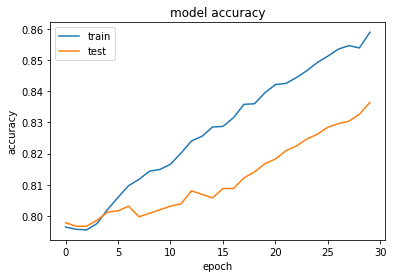

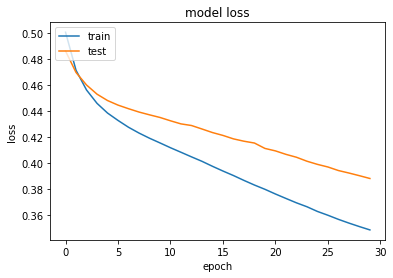

In [26]:
# Model History Graph after adding Parameter which get from parameter tuning

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[1517   78]
 [ 229  176]]
0.8465
